<h2>Progetto Data Visualization</h2>
<h3>Componenti gruppo</h3>
    <ul>
<li>Luca Cassani [817030]</li>
<li>Andrea Cesano [873108]</li>
<li>Geralda Nushi [873269]</li>
 </ul>

<strong>Domanda di ricerca:</strong> Può lo stato di salute mentale post-operatorio essere correlato allo stato di salute fisico post-operatorio? 

Import della libreria Pandas che risulta indispensabile per eseguire operazioni sui dati

In [1]:
import pandas as pd

Creazione del Dataframe pandas dal csv

In [2]:
PROMs_dataset = pd.read_csv("https://raw.githubusercontent.com/Andrece96/CompitinoDataViz/main/dataset.csv")
PROMs_dataset.head(10)

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
2,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
3,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
4,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
5,SF12 MentalScore,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
6,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True
7,SF12 MentalScore,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
8,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True
9,SF12 MentalScore,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True


Creazione di due dataframe contenenti records fisici e mentali (corrispondenti rispettivamente ai records aventi indici pari e dispari) a partire dal dataframe principale

In [3]:
Physical_PROMs = PROMs_dataset.iloc[::2].reset_index().drop("index",axis = 1)
Physical_PROMs.head(10)

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 PhysicalScore,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 PhysicalScore,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
2,SF12 PhysicalScore,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
3,SF12 PhysicalScore,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True
4,SF12 PhysicalScore,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True
5,SF12 PhysicalScore,24.74,46.14,sereno,M,68,20.0,40.0,False,True
6,SF12 PhysicalScore,28.74,37.34,sereno,M,78,17.0,63.0,False,True
7,SF12 PhysicalScore,32.38,36.38,poco nuvoloso,M,81,26.0,59.0,True,True
8,SF12 PhysicalScore,33.09,52.09,poco nuvoloso,M,75,18.0,46.0,False,True
9,SF12 PhysicalScore,28.19,40.19,poco nuvoloso,F,65,20.0,69.0,False,False


In [4]:
Mental_PROMs = PROMs_dataset.iloc[1::2].reset_index().drop("index",axis = 1)
Mental_PROMs.head(10)

,nome_modulistica,score_preop,score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,SF12 MentalScore,54.36,58.46,poco nuvoloso,F,70,20.0,69.0,False,True
1,SF12 MentalScore,57.02,64.62,poco nuvoloso,M,69,18.0,65.0,False,True
2,SF12 MentalScore,60.27,58.47,poco nuvoloso,M,70,23.0,74.0,False,True
3,SF12 MentalScore,50.17,54.97,poco nuvoloso,F,66,15.0,72.0,False,True
4,SF12 MentalScore,54.14,55.74,nebbia al mattino,F,73,18.0,75.0,False,True
5,SF12 MentalScore,50.13,58.23,sereno,M,68,20.0,40.0,False,True
6,SF12 MentalScore,28.39,45.59,sereno,M,78,17.0,63.0,False,True
7,SF12 MentalScore,34.14,62.84,poco nuvoloso,M,81,26.0,59.0,True,True
8,SF12 MentalScore,62.61,60.21,poco nuvoloso,M,75,18.0,46.0,False,True
9,SF12 MentalScore,32.39,29.79,poco nuvoloso,F,65,20.0,69.0,False,False


Si procede con l'aggregazione delle righe relative ai singoli pazienti. Per distinguere gli attributi "score_preop" e "score_postop" riferiti ai PROMs mentali dagli attributi riferiti ai PROMs fisici si introducono i prefissi "mental_" e "physical_". Viene inoltre rimossa la colonna "nome_modulistica" in quanto non più discriminante.

In [5]:
PROMs = pd.concat([Mental_PROMs[["score_preop","score_postop"]].add_prefix("mental_"), Physical_PROMs], axis = 1)
PROMs = PROMs.rename(columns={'score_preop': 'physical_score_preop', 'score_postop': 'physical_score_postop'})
PROMs = PROMs.drop("nome_modulistica", axis = 1)
PROMs.head(10)

,mental_score_preop,mental_score_postop,physical_score_preop,physical_score_postop,condizioni_meteo,sesso,anni_ricovero,temperatura_media,umidita_media,HI > 27,natural_light
0,54.36,58.46,27.60,37.40,poco nuvoloso,F,70,20.0,69.0,False,True
1,57.02,64.62,28.15,38.25,poco nuvoloso,M,69,18.0,65.0,False,True
2,60.27,58.47,31.57,55.67,poco nuvoloso,M,70,23.0,74.0,False,True
3,50.17,54.97,34.28,57.08,poco nuvoloso,F,66,15.0,72.0,False,True
4,54.14,55.74,27.43,29.13,nebbia al mattino,F,73,18.0,75.0,False,True
5,50.13,58.23,24.74,46.14,sereno,M,68,20.0,40.0,False,True
6,28.39,45.59,28.74,37.34,sereno,M,78,17.0,63.0,False,True
7,34.14,62.84,32.38,36.38,poco nuvoloso,M,81,26.0,59.0,True,True
8,62.61,60.21,33.09,52.09,poco nuvoloso,M,75,18.0,46.0,False,True
9,32.39,29.79,28.19,40.19,poco nuvoloso,F,65,20.0,69.0,False,False


Limitiamo il nostro Dataframe ai soli attributi di interesse per l'analisi che verrà condotta.

In [6]:
PROMs = PROMs[['physical_score_postop', 'mental_score_postop', 'sesso', 'anni_ricovero']]
PROMs.head(10)

,physical_score_postop,mental_score_postop,sesso,anni_ricovero
0,37.40,58.46,F,70
1,38.25,64.62,M,69
2,55.67,58.47,M,70
3,57.08,54.97,F,66
4,29.13,55.74,F,73
5,46.14,58.23,M,68
6,37.34,45.59,M,78
7,36.38,62.84,M,81
8,52.09,60.21,M,75
9,40.19,29.79,F,65


Import del modulo pyplot della libreria matplotlib (utile per realizzare le visualizzazioni)  e della libreria numpy (utile per il calcolo scientifico)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Assegnazione delle colonne "physical_score_postop" e "mental_score_postop" del dataframe alle variabili python "x" e "y"

In [8]:
x = PROMs['physical_score_postop']
y = PROMs['mental_score_postop']

Stampa del coefficiente di correlazione di Pearson. Creazione dello scatter plot delle condizioni fisiche e mentali post-operatorie e inserimento della linea di Best Fit. 

[[1.         0.28265526]
 [0.28265526 1.        ]]


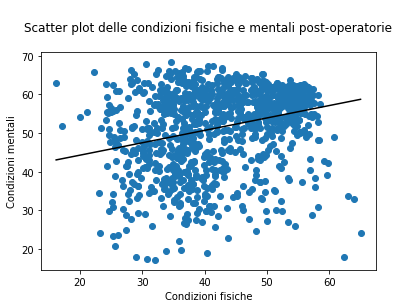

In [9]:
print(np.corrcoef(x, y))
plt.title('\nScatter plot delle condizioni fisiche e mentali post-operatorie\n')
plt.xlabel('Condizioni fisiche')
plt.ylabel('Condizioni mentali')
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='black')

Dalla visualizzazione e dal valore dell'indice di correlazione ottenuti si evince una scarsa correlazione tra le variabili osservate. E' opportuno evidenziare che, avendo un coefficiente di correlazione di tipo lineare, non è possibile escludere a priori l'esistenza di una correlazione non lineare. 

Avendo comunque osservato una correlazione, si decide di proseguire l'analisi su sottogruppi della popolazione. In particolare, verranno considerati i sottogruppi riferiti al genere e verrà operata una divisione in classi sull'età utilizzando i quantili (terzili). 

Si procede con l'individuazione dei valori dei terzili relativi agli anni di ricovero.
Successivamente si dividono i records del dataset in funzione degli attributi "sesso" ed "anni ricovero".

In [10]:
print(PROMs['anni_ricovero'].quantile(q=0.33, interpolation='linear'))
print(PROMs['anni_ricovero'].quantile(q=0.66, interpolation='linear'))

65.0
74.0


In [11]:
PROMsq1M = PROMs.query("anni_ricovero < 65 and sesso == 'M'")

PROMsq1F = PROMs.query("anni_ricovero < 65 and sesso == 'F'")

PROMsq2M = PROMs.query("65 <= anni_ricovero < 74  and sesso == 'M'")

PROMsq2F = PROMs.query("65 <= anni_ricovero < 74 and sesso == 'F'")

PROMsq3M = PROMs.query("anni_ricovero >= 74  and sesso == 'M'")

PROMsq3F = PROMs.query("anni_ricovero >= 74 and sesso == 'F'")

Calcolo dei coefficienti di correlazione (Pearson) per ciascun sottogruppo ottenuto.

In [12]:
print(np.corrcoef(PROMsq1M['physical_score_postop'], PROMsq1M['mental_score_postop']))
print("")
print(np.corrcoef(PROMsq1F['physical_score_postop'], PROMsq1F['mental_score_postop']))
print("")
print(np.corrcoef(PROMsq2M['physical_score_postop'], PROMsq2M['mental_score_postop']))
print("")
print(np.corrcoef(PROMsq2F['physical_score_postop'], PROMsq2F['mental_score_postop']))
print("")
print(np.corrcoef(PROMsq3M['physical_score_postop'], PROMsq3M['mental_score_postop']))
print("")
print(np.corrcoef(PROMsq3F['physical_score_postop'], PROMsq3F['mental_score_postop']))

[[1.         0.33257128]
 [0.33257128 1.        ]]

[[1.         0.27579791]
 [0.27579791 1.        ]]

[[1.         0.29371252]
 [0.29371252 1.        ]]

[[1.         0.27154537]
 [0.27154537 1.        ]]

[[1.         0.30346901]
 [0.30346901 1.        ]]

[[1.         0.16358954]
 [0.16358954 1.        ]]


Dai risultati ottenuti si evince una correlazione significativa (pari a 0.33) per il sottogruppo "Maschi < 65", mentre per il sottogruppo "Femmine > 74" la correlazione risulta minima (pari a 0.16).
Si procede quindi con la realizzazione della visualizzazione dei due sottogruppi. 

[[1.         0.33257128]
 [0.33257128 1.        ]]
[[1.         0.16358954]
 [0.16358954 1.        ]]


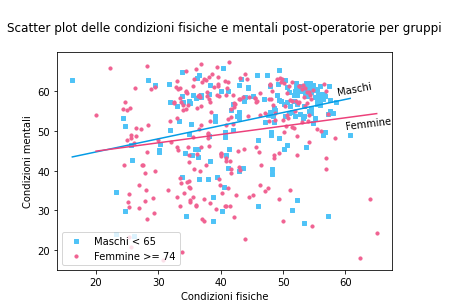

In [13]:
x1 = PROMsq1M['physical_score_postop']
y1 = PROMsq1M['mental_score_postop']

x2 = PROMsq3F['physical_score_postop']
y2 = PROMsq3F['mental_score_postop']

plt.rcParams['axes.facecolor'] = 'white'
print(np.corrcoef(x1, y1))
print(np.corrcoef(x2, y2))
plt.title('\nScatter plot delle condizioni fisiche e mentali post-operatorie per gruppi\n')
plt.xlabel('Condizioni fisiche')
plt.ylabel('Condizioni mentali')
plt.scatter(x1, y1, s=10, c='#4fc3f7', marker="s", label='Maschi < 65')
plt.scatter(x2, y2,  s=10, c='#f06292', marker="o", label='Femmine >= 74')
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)), color='#039be5')
plt.plot(np.unique(x2), np.poly1d(np.polyfit(x2, y2, 1))(np.unique(x2)), color='#ec407a')
plt.legend(loc='lower left');
plt.annotate("Maschi", xy= (58.5, 59), rotation=11)
plt.annotate("Femmine", xy= (60, 50.5), rotation=7)
plt.savefig("Desktop/visualizzazione.jpg", dpi = 300)

Questa visualizzazione mostra la correlazione esistente tra condizioni mentali e fisiche post-operatorie nei sottogruppi "Maschi < 65" e "Femmine >= 74". Si può osservare che, dopo un'operazione all'anca, alla caviglia o al ginocchio, la percezione del proprio stato di salute mentale rispetto a quello fisico presenti correlazione massima nei soggetti maschi con età inferiore a 65 anni.